In [2]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

Inside splitter: 
0 0 6
0
1
2
3
4
5
False
Inside splitter: 
0 0 4
5
1
4
3
2
0
False
[[[2.5 ]]

 [[3.25]]

 [[2.  ]]

 [[4.5 ]]

 [[1.  ]]]
[        inf  4.64656872 -2.         -2.         -2.        ]
[2.91666667 2.1875     1.         0.25       1.        ]
2
[Text(0.6, 0.8333333333333334, 'x[0] <= inf\nsquared_error = 2.917\nsamples = 6\nvalue = 2.5'),
 Text(0.4, 0.5, 'x[0] <= 4.647\nsquared_error = 2.188\nsamples = 4\nvalue = 3.25'),
 Text(0.2, 0.16666666666666666, 'squared_error = 1.0\nsamples = 2\nvalue = 2.0'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = 4.5'),
 Text(0.8, 0.5, 'squared_error = 1.0\nsamples = 2\nvalue = 1.0')]


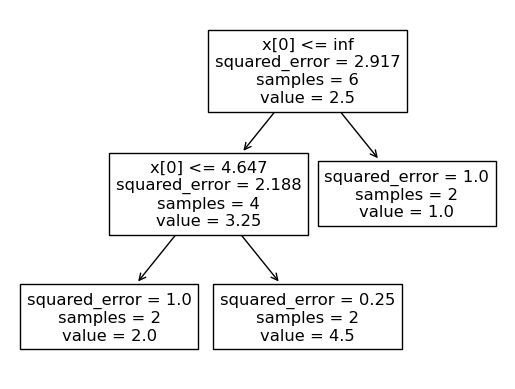

In [4]:
# With this dataset, the missing values will always be sent to the left child
# at the first split. The leaf will be pure.
X = np.array([np.nan, 2, np.nan, 4, 5, 6]).reshape(-1, 1)
# X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.arange(6)

tree = ExtraTreeRegressor(random_state=2).fit(X, y)
# tree = DecisionTreeRegressor(random_state=2).fit(X, y)
print(tree.tree_.value)
print(tree.tree_.threshold)
print(tree.tree_.impurity)
print(tree.get_depth())

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from pprint import pprint
dtree = plot_tree(tree)
pprint(dtree)
plt.show()

In [3]:
assert all(tree.tree_.impurity >= 0)  # MSE should always be positive
# assert False
# Find the leaves with a single sample where the MSE should be 0
leaves_idx = np.flatnonzero(
    (tree.tree_.children_left == -1) & (tree.tree_.n_node_samples == 1)
)
print(leaves_idx)
assert_allclose(tree.tree_.impurity[leaves_idx], 0.0)

AssertionError: 